# Rabin Miller Primality Test

We will implement the Rabin Miller Primality Test - which takes in an odd integer and returns false if the integer is composite and true if the integer is "probably" prime. It is based off of Fermat's Theorem and Euclid's Lemma.

$\textbf{Fermat's Theorem:}$ If $n$ is prime, $a^{n-1} \equiv 1 (mod n)$ for all $a \in \mathbb{Z}$

$\textbf{Euclid's Lemma:}$ If a prime $p$ divides the product $ab$ of two integers $a$ and $b$, then $p$ must divide at least one of those integers $a$ and $b$

In [2]:
import random as ran

#### Algorithm Explained:

Given an odd integer $n$, let $n=2^rs+1$ for some odd s. Then choose a random integer $a \in \{2,...,n-1\}$. If $a^s\equiv1 (mod n)$ (Fermat's Little Theorem) or $a^{2^js}\equiv-1 (mod n)$ for some $0<=j<=r-1$ (Euclid's Lemma), then we say $n$ is probably prime. A prime will pass the test for all a. The run time of this algorithm is $O(k \log3n)$.

In [3]:
def rabin_miller(n, k):
    """Return True if n passes k rounds of the Miller-Rabin primality
    test (and is probably prime). Return False if n is proved to be
    composite.

    """
    #deal with base case
    if n==2: return True #return true if n is known prime 2
    if n < 2: return False #return false if n is 1
    
    #factor n=2^r*s+1
    r, s = 0, n - 1 #define variables r, s, n-1
    while s % 2 == 0: #while s=n-1 is an even number 
        r += 1 
        s //= 2 #performs s/2 int division 
        
    for i in range(k): #loop through k times 
        a = ran.randint(2, n - 1) #define a as a random integer between 2 and n-1
        
        #check if a^(s) = 1 (mod n)?
        x = pow(a, s, n) #x= a^s mod n 
        if x == 1 or x == n - 1: #if the result is 1 or n-1 it has not failed the test yet, continue through the loop
            continue
        
        #check if a^(2^{j * s}) mod n = -1 mod n?
        for j in range(r - 1): #loop r-1 times 
            x = pow(x, 2, n) #x=x^2(mod n)
            if x == n - 1: #if the result of the modulo is n-1, break out of the loop 
                break
        else:
            return False
    return True

In [4]:
#we will test the algorithm on a few known primes and composites
rabin_miller(307,10)

True

In [5]:
rabin_miller(402,10)

False

### Percent Error

It is important to note that this test returns true if a number if PROBABLY prime - implying that there will be errors. However, the probably of a composite passing the test is very low, and decreases as we increase k. The code and graph below illustrate how the chance of error decreases as k increases. 

In [6]:
#loop through rabin_miller function lots of times, passing in from array of known prime numbers. 
#If returns false then it is an error. Graph error rate 
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 
          103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 
          211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 
          337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 
          449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 
          593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727,
          733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877,
          881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]

k_error_list = []

for k in range (1,50):
    k_error = 0
    for p in range(4,1000): 
        for i in range(1,10): #do each number 10 times
            if (rabin_miller(p,k) == True):
                if p not in primes:
                    k_error+=1
    k_error_list.append(k_error/10)

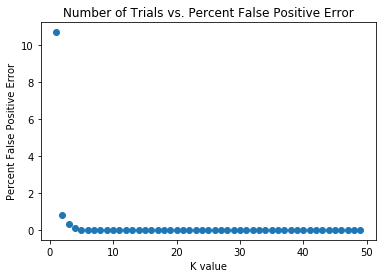

In [19]:
import matplotlib.pyplot as plt

plt.scatter(range(1,50),k_error_list)
plt.title('Number of Trials vs. Percent False Positive Error')
plt.xlabel("K value")
plt.ylabel('Percent False Positive Error')
plt.show()

#### Proven Probability of Error
According to Wolfram Mathworld, it has been proven that a composite number passes the Rabin-Miller test for at most $\frac{1}{4}$ of possible bases $a$. When $N$ independent tests are performed the probability that a composite number passes each test is at most $\frac{1}{4^N}$. This is illustrated below.

In [12]:
false_prime = 0
for i in range(1,10000):
    if (rabin_miller(438,2)== True):
        false_prime += 1

print('The proportion of times the algorithm said the odd composite was a prime was: ', false_prime)
        

The proportion of times the algorithm said the odd composite was a prime was:  0


According to the theoretical bound, the probability that this composite number passes is at most $\frac{1}{16}$. Our result mathes this bound - in one case of running this code the probability that 438 passes the Rabin-Miller test given 2 independent trials was $0.02$ (which is obviously less than $0.0625$ after we looped 1000 times. 

We will now run through this code 50 times and keep track of how many errors we run into. We will display these results in a graph.

In [17]:
error_array = []
for i in range(1,100):
    false_prime = 0
    for j in range(1,10000):
        if (rabin_miller(438,2)== True):
            false_prime += 1
    error_array.append(false_prime/100)

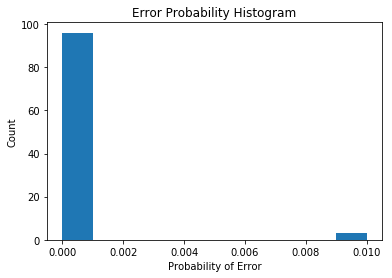

In [18]:
plt.hist(error_array)
plt.title("Error Probability Histogram")
plt.xlabel("Probability of Error")
plt.ylabel("Count")
plt.show()

### Extension

For any composite Fermat number $F_n = 2^{2n}+1$, prove that $F_n$ is a strong pseudoprime to the base 2 (odd composite integer that passes test to base $a$)

(Elementary Number Theory, Burton, 348)

We will simulate this claim by running a modified Rabin Miller Algorithm for a=2 on the first 50 Fermat Numbers.

In [86]:
#Python code to generate a Fermat Number
def generate_fermat(n):
    return 2**(2**n)+1

#modified code for a=2
def modified_rm(n,k):
    if n==2: return True
    if n < 2: return False
    
    r, s = 0, n - 1
    while s % 2 == 0:
        r += 1
        s //= 2
    for _ in range(k):
        a = 2
        x = pow(a, s, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

In [87]:
for i in range (1,50):
    n = generate_fermat(i)
    print(n)
    print(modified_rm(n,10))

5
True
17
True
257
True
65537
True
4294967297
True
18446744073709551617
True
340282366920938463463374607431768211457
True
115792089237316195423570985008687907853269984665640564039457584007913129639937
True
13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084097
True
179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137217
True
323170060713110073007148766886699519604441026697154840321303454275246551388678908931972014115229134636887179609218980194941195591504909210950881523864482831206308773673009960917501977503896521067960576383840675682767922186426197561618380943384761704705816458520363050428875758915410658086075523991239303855219143333896

True
40141321820360630391660606060388767343771510270414189955825538064669013687292583411605220258161249937899936958223706883046649515071885471234232227070284626457445044950997712360397727314795261092110900043117944042403391247845474223452160140912698962420577287893203083880754645356937347079388103611588228891298106981608819913613916157278984879221119259543578662319920155661120082361875702394984079276839279197758422886639531972673276155227639905469743022258084280954148683541898874775471300700925143532416317801554398248755669690894068901904533012194019447556357820110046579475055740858007809572408309894055420274716975980707082238893603272466483602505904231934854057400248186609663960888095479012435411129910572945644931760301965709684156270541193862942177372367058296323226358301020026624164784380217602754733662295483900199654277814608430169196984860051069819248564841351891263095113557536916539923288436452265352512732571072076551445219852791946876706181371333650617676806926043268025964871424

True
16113257174857604736195721184520050106440238745496695174763712504960718342823532757033064753153854111107217980956972311094371313807551987645270427615679688389330444133499923357612295105472898569728180212454103335089943629049973591907780692062057296552903280552403216694239075203891327355460071271019202307459542499755131303645773654911843755650169520801985361294149607500956837794546801458249510087206015145950849590956971307083110865729968620669481023248557683622154370297881298560466161255588004643805849285632501063457275606556201834157077069866350431709941244149430340376804687891750978965251971591273251528666837509921501820059959278974772955137066499435490409471962069956797070262724882828175396608842375949253862079040514343986517421482079629239951733227576757861140019256666088017481676787816929626050753513514197997219880636635517074110811110090917718919814526080394093014634680319034280918429077805893913799277691975372698510166677624523615113420055448312509654324275129878416504650858

True
25963705678310007761265964957268828277447343763484560463573654867754610524588205062912977949472148973955899623754597505095706754518595782067578760953150869726280696175193149637786658336789004041217053641938592198287409455940784830944877443474270036144538694008327649341467279097607822209499119517524453935486374924725488439548566995552878443488569316887877375933178015951205574316350748258323682783254526607649718655906426859797564916237828912829042201750343062896041871273982291601111931035412445965160861392924342389029916264294871289205564109658538501842712079149879311497108104131160328100817721994910112795311872592196129096103842746494480865650819711100491539723188169863684693882013126895836175240344492253730519571773068449388950215431768135487966370544672157458602946209276661893186679201178178660761049120420700243097361323529664926990304037482228104211165480122326378180469716240215346770224101647204199412249012087757191004905502063537733833482825164883640210769911614099629287806423

True
67411401254990734022690651047042454376201859485326882846944915676742270700738254324012189093273958935189763096092662578499572617038706183124893135193833022989256953210196289468241672863888618038537874881666541392847226977445968742340884809089414305471324099320290445257669398812381147850679486141068777106846241963630108359641749212181836654212482724180596063317308977734704851773936716905551669397095763288202060410118527327442490158969111281996293213429770950997664449086845487573646329916443392868735675338887493854554723112388436112476590104636978314187941020601103652043810572805628594182610758661438134364867149720092052842063850921820105755778301374301998205964916102148880463083063681194356285817173546226418594070516920632907297327680323570097478938417642571727885865692342935027398978848714162873276729784189093131668670745793408545374977323158465508916526032892626526906254259330166128400105835749887758768173155506943383029908986754981937127357421172164923003694554250327792161312333

True
45442970191613663099961595907970650433180103994591456270882095573433238995068447846578210099100896722870855839555713661630745919865374198415658494751625750035390305945369042511792022343391958872242735261397568501424171612483438102891760941877021257847014596577538889196013362639224980743463696832768136467603724556145041244711290410093345072619852416592313951501172707029578662648032799612327445329710412970659056663041953541390571418328177743229040530757861246848423200536901295099574561189778994447206296849527337205206244063239460993088389302833493070580984012476071865445891602571174333546338432748128813403074353427621915402027437516441691566796295775784228594221956774522450451613926152598655870833741802587485830771691301531130018022284478514070549751915851268977338317021795846599834345320607540633488520151433563995691250962966601347942315549615561010104318692717820161620706161267051696908477015048641643732058746794174582467631006913592545676612031851244658879372152445969661463786643

True
20650635398358879243991194945816501695274360493029670347841664176800041553335652936057509677535527151427868237064574934824549293767546359077920008818501313826426823106013346012778095984519801219909531075504287833161324840811684971720284491337186421302100076509403419310287743147286205798438391891910433320816354801660161002935402954568571003081410242475346704885642194132346012204417456032430353391417591466278673352755565006094263750177280726036253113510694507482207519754056595315720092484784103391134845232251829862635063872880713703849779393812835168305411518046989472329311728260530608777421831520043254548404201827005795137367646261052061654579029323493859679786690498837065698423477573821529014844741574575824006613498018575107042468295045569151710203003120728243352497582775250167786050106244195250645288190283533077837288052527533280640970024559638002882824665824080142766202780625376961666657630997398134787448681657178837727788110375597422716407295985335777454833638174398931969736624

KeyboardInterrupt: 

$\textbf{Proof:}$ We will now prove that all odd composite Fermat numbers are strong pseudoprimes to the base $2$. Consider the composite Fermat number $F_n=2^{2^{n}}+1$. Notice $2^{2^{n}}+1-1\equiv-1(mod2^{2^{n}}+1)$. Raising both sides by $2^{2^{m}-m}$, we get $2^{2^{m+2^{m}-m}}=1^{2^{m}}/1^m=1^m/1^m\equiv1(mod F_m)$. Thus we get $2(2^{2^{2^m}})\equiv 1(mod F_m)$ and finally $2^{2^{2^{m+1}}}\equiv 2(mod F_m)$. This is equivalemnt to $2^n\equiv 1(mod n)$ and thus we have shown that while n is a composite number, it passes Fermat's little theorem, and thus it is a strong pseudoprime.